In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('fivethirtyeight') 
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression

In [7]:
path = ''

In [8]:
data_df = pd.read_csv('cleaned_data.csv')

In [9]:
data_df.shape

(2970, 78)

In [10]:
data_df.head()

,Country,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,GDP_growth,1100,1110,...,AC,AD,AE,AF,AG,AH,AI,AJ,AK,CUS
0,Argentina,1965,NaN,NaN,NaN,NaN,NaN,10.569433,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,1966,NaN,NaN,NaN,NaN,NaN,-0.659726,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,1967,NaN,NaN,NaN,NaN,NaN,3.191997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,1968,NaN,NaN,NaN,NaN,NaN,4.822501,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,1969,NaN,NaN,NaN,NaN,NaN,9.679526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 78 columns):
Country                     2970 non-null object
Year                        2970 non-null int64
Top_1                       1707 non-null float64
Tax_Rev_to_GDP              1130 non-null float64
Individual_Spending_Rate    903 non-null float64
Society_Spending_Rate       1013 non-null float64
Top_Rate                    391 non-null float64
GDP_growth                  2164 non-null float64
1100                        1130 non-null float64
1110                        1130 non-null float64
1120                        1130 non-null float64
1200                        1130 non-null float64
1210                        1130 non-null float64
1220                        1130 non-null float64
1300                        1130 non-null float64
2100                        1130 non-null float64
2110                        1130 non-null float64
2120                        1130 non-null float6

In [12]:
countries = data_df.Country.unique()
print(len(countries))
print(countries)

58
['Argentina' 'Australia' 'Bahrain' 'Brazil' 'Canada' 'China' 'Colombia'
 'Cote d’Ivoire' 'Croatia' 'Czech Republic' 'Denmark' 'Egypt' 'Finland'
 'France' 'Germany' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland'
 'Italy' 'Japan' 'Jordan' 'Korea' 'Kuwait' 'Lebanon' 'Malaysia'
 'Mauritius' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Palestine'
 'Poland' 'Portugal' 'Qatar' 'Russian Federation' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Syrian Arab Republic' 'Taiwan' 'Turkey' 'United States'
 'United Arab Emirates' 'United Kingdom' 'Uruguay' 'Yemen' 'Zimbabwe'
 'Austria' 'Belgium' 'Israel']


Argentina
Australia
Bahrain
Brazil
Canada
China
Colombia
Cote d’Ivoire
Croatia
Czech Republic
Denmark
Egypt
Finland
France
Germany
Hungary
India
Indonesia
Iran
Iraq


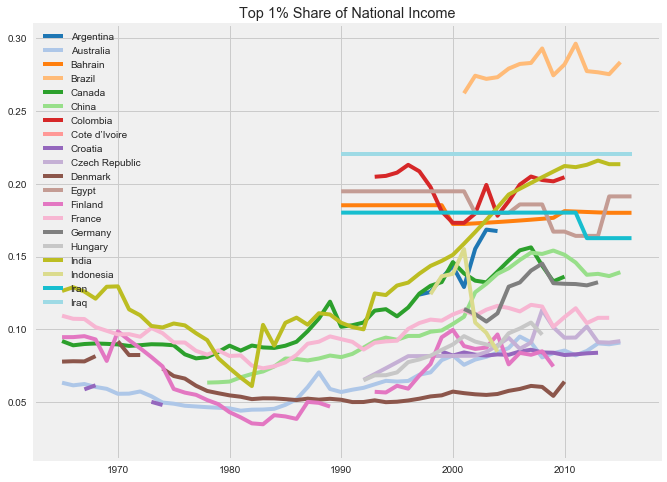

In [15]:
years = sorted(data_df.Year.unique())
colors = list(plt.cm.tab20(np.arange(20)))
plt.figure(figsize=(10, 8))

for i, country in enumerate(countries[:20]):
    print(country)
    plt.plot(years, data_df[data_df['Country'] == country]
             .Top_1, color=colors[i])

plt.legend(countries)

plt.title('Top 1% Share of National Income')
plt.show()

In [46]:
usa_df = data_df[data_df['Country'] == 'United States']
usa_df.describe()

,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,1100,1200,1300,2100,...,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
count,52.000000,49.000000,52.000000,46.000000,46.000000,17.000000,52.000000,52.000000,52.0,52.000000,...,52.0,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.0,52.000000
mean,1990.500000,0.147344,25.393000,6.082575,7.320695,43.417647,37.136705,9.660334,0.0,9.707353,...,0.0,0.099417,15.859699,7.398251,0.0,8.461448,5.856149,2.550362,0.0,0.000371
std,15.154757,0.034426,1.206995,0.291512,1.773774,2.346336,2.437122,2.819186,0.0,1.768728,...,0.0,0.097317,1.344403,0.964543,0.0,2.160444,2.363260,0.237663,0.0,0.000702
min,1965.000000,0.104060,23.017000,5.547652,4.102360,41.300000,31.668882,5.727794,0.0,5.064602,...,0.0,0.000000,13.930789,4.799368,0.0,6.136030,3.194404,2.158135,0.0,0.000000
25%,1977.750000,0.112640,24.415500,5.880411,5.969194,41.400000,35.346404,7.564880,0.0,8.564293,...,0.0,0.000000,14.871569,7.007058,0.0,6.976708,4.041798,2.340674,0.0,0.000000
50%,1990.500000,0.145420,25.558000,6.076418,7.245591,41.700000,37.064797,8.832773,0.0,10.510716,...,0.0,0.163830,15.590735,7.767429,0.0,7.739109,4.830134,2.511040,0.0,0.000000
75%,2003.250000,0.177090,26.027000,6.269353,8.831195,46.300000,38.900815,11.408060,0.0,10.931428,...,0.0,0.190908,16.589273,8.050135,0.0,9.213466,7.227168,2.759458,0.0,0.000000
max,2016.000000,0.207790,28.202000,6.790424,10.200683,46.500000,42.544527,17.354742,0.0,12.090263,...,0.0,0.224094,19.937493,8.484569,0.0,15.138126,12.698327,3.019669,0.0,0.002210


In [47]:
others_df = data_df[data_df['Country'] != 'United States']
others_df.describe()

,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,1100,1200,1300,2100,...,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
count,728.00000,599.000000,722.000000,502.000000,502.000000,238.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,1990.50000,0.083910,33.040922,11.407881,8.447990,45.916807,31.175628,9.052912,0.545051,6.171684,...,0.089805,0.008429,27.789278,15.309018,12.541962,12.477699,9.325017,1.888633,0.063260,0.491713
std,15.01865,0.024857,7.696133,3.250905,1.717124,6.426702,11.410140,5.108980,1.319050,4.930760,...,0.273786,0.053769,6.850498,5.782277,8.492526,5.627415,5.107675,1.165102,0.335399,1.159682
min,1965.00000,0.040700,0.000000,4.286857,5.060437,33.000000,0.000000,0.000000,-2.177124,0.000000,...,0.000000,-0.488767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.451528,-0.043695
25%,1977.75000,0.064123,27.476000,9.574773,7.338905,40.000000,23.892781,5.427891,0.000000,1.181942,...,0.000000,0.000000,23.887060,12.273441,0.000000,8.653477,6.310340,1.143700,0.000000,0.000000
50%,1990.50000,0.083580,32.803000,11.045559,8.074918,46.500000,29.851108,7.812819,0.000000,5.897144,...,0.000000,0.000000,26.820911,15.721882,14.958714,10.886932,7.967887,1.685762,0.000000,0.012992
75%,2003.25000,0.097980,38.963250,12.981022,9.463780,49.375000,38.592445,11.056961,0.435403,9.086454,...,0.000000,0.000000,31.615048,19.465045,19.131010,14.917970,11.090423,2.227382,0.000000,0.227754
max,2016.00000,0.164858,49.536000,19.389098,14.675864,62.300000,61.606226,29.404028,7.186524,18.247712,...,3.155821,0.403860,50.690220,30.979214,30.979214,43.488120,42.639847,8.071790,2.150295,5.972563


In [22]:
data_df.columns[7:]

Index(['1100', '1200', '1300', '2100', '2200', '2300', '2400', '4100', '4200',
       '4300', '4400', '4500', '4600', '5100', '5110', '5111', '5120', '5121',
       '5200', '5300', '6000'],
      dtype='object')

In [25]:
cols1 = list(data_df.columns[2:7])
cols2 = [data_df.columns[2]] + list(data_df.columns[7:])
print(cols1)
print(cols2)

['Top_1', 'Tax_Rev_to_GDP', 'Individual_Spending_Rate', 'Society_Spending_Rate', 'Top_Rate']
['Top_1', '1100', '1200', '1300', '2100', '2200', '2300', '2400', '4100', '4200', '4300', '4400', '4500', '4600', '5100', '5110', '5111', '5120', '5121', '5200', '5300', '6000']


In [27]:
data_df[cols1].corr()

,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate
Top_1,1.000000,-0.279567,-0.321565,0.009765,-0.231833
Tax_Rev_to_GDP,-0.279567,1.000000,0.763534,0.072705,0.345554
Individual_Spending_Rate,-0.321565,0.763534,1.000000,-0.031889,0.681731
Society_Spending_Rate,0.009765,0.072705,-0.031889,1.000000,-0.295928
Top_Rate,-0.231833,0.345554,0.681731,-0.295928,1.000000


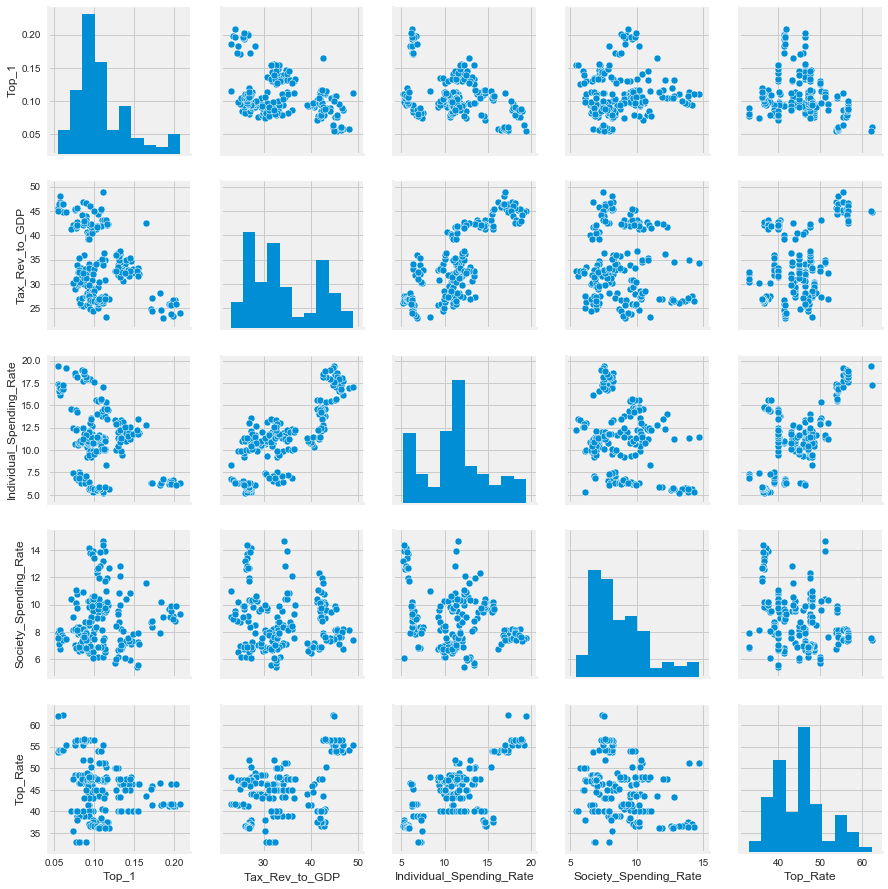

In [44]:
# Plot all of the variable-to-variable relations as scatterplots
temp = data_df[cols1].dropna()
temp.reset_index(drop=True, inplace=True)
sns.pairplot(temp)

In [73]:
cols3 = cols2[:8]
cols3

['Top_1', '1100', '1200', '1300', '2100', '2200', '2300', '2400']

In [77]:
cols4 = [cols2[0]] + cols2[8:]
cols4

['Top_1',
 '4100',
 '4200',
 '4300',
 '4400',
 '4500',
 '4600',
 '5100',
 '5110',
 '5111',
 '5120',
 '5121',
 '5200',
 '5300',
 '6000']

In [78]:
data_df[cols3].corr()

,Top_1,1100,1200,1300,2100,2200,2300,2400
Top_1,1.000000,-0.262204,0.103798,-0.044747,0.541727,0.151257,0.207065,-0.015917
1100,-0.262204,1.000000,-0.058375,0.313186,-0.548239,-0.690787,-0.538629,-0.191396
1200,0.103798,-0.058375,1.000000,0.007140,-0.053148,-0.272027,0.003903,-0.025758
1300,-0.044747,0.313186,0.007140,1.000000,-0.196783,-0.314870,-0.206357,-0.043279
2100,0.541727,-0.548239,-0.053148,-0.196783,1.000000,0.544326,0.562000,-0.132665
2200,0.151257,-0.690787,-0.272027,-0.314870,0.544326,1.000000,0.618667,-0.139092
2300,0.207065,-0.538629,0.003903,-0.206357,0.562000,0.618667,1.000000,-0.092800
2400,-0.015917,-0.191396,-0.025758,-0.043279,-0.132665,-0.139092,-0.092800,1.000000


In [79]:
data_df[cols4].corr()

,Top_1,4100,4200,4300,4400,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
Top_1,1.000000,0.431471,0.014121,0.133174,-0.131411,0.125974,0.327837,-0.448495,-0.134179,-0.145984,-0.485545,-0.483288,0.024781,-0.045349,0.091749
4100,0.431471,1.000000,-0.397454,0.431366,-0.294952,0.115328,0.191306,-0.207006,-0.372468,-0.379099,0.127228,0.134849,0.381997,-0.236208,-0.032628
4200,0.014121,-0.397454,1.000000,-0.011196,0.003215,-0.035786,-0.105461,-0.103764,-0.056481,-0.093378,-0.076168,-0.121866,-0.003503,-0.057136,-0.079676
4300,0.133174,0.431366,-0.011196,1.000000,0.051260,-0.163663,-0.013345,-0.192140,-0.500154,-0.458880,0.282604,0.275441,0.123316,-0.204832,-0.052473
4400,-0.131411,-0.294952,0.003215,0.051260,1.000000,-0.043947,-0.067542,-0.004465,-0.127464,-0.137047,0.130233,0.002853,0.055303,0.115000,-0.001398
4500,0.125974,0.115328,-0.035786,-0.163663,-0.043947,1.000000,0.083725,-0.066307,0.009574,-0.058636,-0.096878,-0.147502,0.117856,0.100678,0.163057
4600,0.327837,0.191306,-0.105461,-0.013345,-0.067542,0.083725,1.000000,-0.232154,-0.162701,-0.133511,-0.129936,-0.136093,0.042346,0.231872,0.291645
5100,-0.448495,-0.207006,-0.103764,-0.192140,-0.004465,-0.066307,-0.232154,1.000000,0.663059,0.465727,0.600742,0.611916,-0.091714,-0.029235,-0.021898
5110,-0.134179,-0.372468,-0.056481,-0.500154,-0.127464,0.009574,-0.162701,0.663059,1.000000,0.838338,-0.200106,-0.111606,-0.314887,0.078921,0.132346
5111,-0.145984,-0.379099,-0.093378,-0.458880,-0.137047,-0.058636,-0.133511,0.465727,0.838338,1.000000,-0.285854,-0.090216,-0.379674,0.118851,0.144673


### Let's Look At Just the USA

In [48]:
usa_df[cols1].corr()

,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate
Top_1,1.000000,0.246118,0.429675,0.894945,-0.272385
Tax_Rev_to_GDP,0.246118,1.000000,-0.283404,0.164201,0.519368
Individual_Spending_Rate,0.429675,-0.283404,1.000000,0.477191,-0.533550
Society_Spending_Rate,0.894945,0.164201,0.477191,1.000000,-0.049277
Top_Rate,-0.272385,0.519368,-0.533550,-0.049277,1.000000


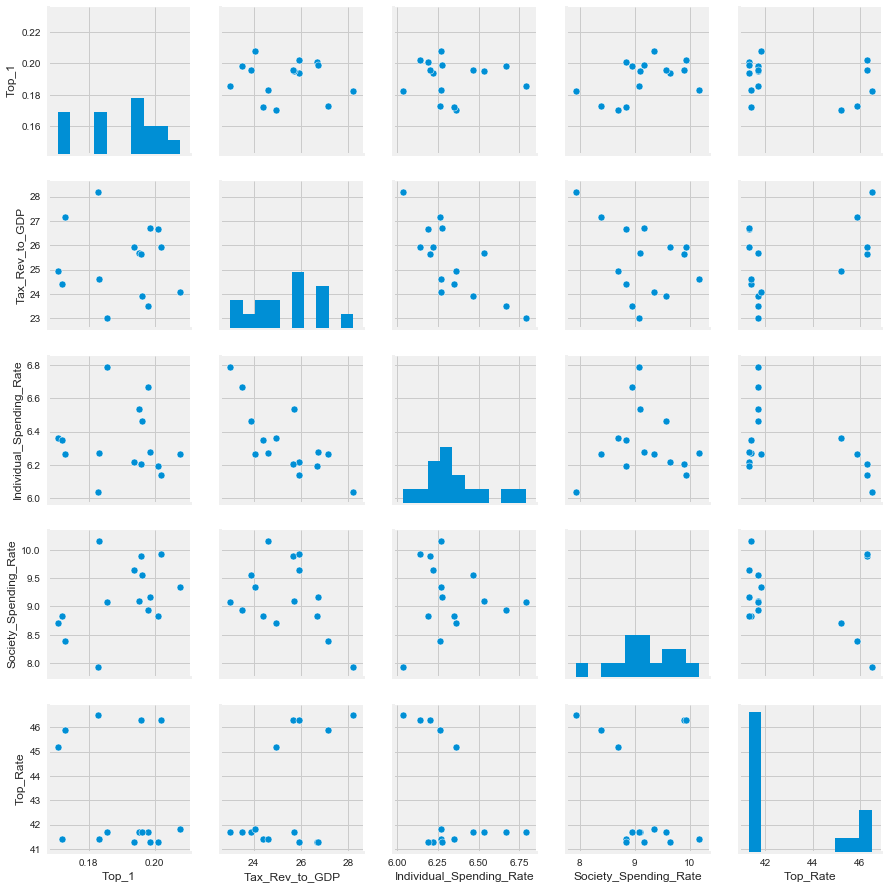

In [50]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(usa_df[cols1].dropna())

In [54]:
usa_df[cols2].dropna().corr()

,Top_1,1100,1200,1300,2100,2200,2300,2400,4100,4200,...,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
Top_1,1.000000,0.287676,-0.447991,NaN,0.551853,0.444043,0.826684,NaN,-0.265066,NaN,...,NaN,0.839612,-0.722721,0.645916,NaN,-0.746552,-0.798784,0.551437,NaN,-0.453569
1100,0.287676,1.000000,-0.560207,NaN,0.364534,0.362445,0.226387,NaN,-0.766097,NaN,...,NaN,0.202595,-0.654456,0.336649,NaN,-0.560435,-0.494865,-0.294122,NaN,0.266856
1200,-0.447991,-0.560207,1.000000,NaN,-0.849455,-0.857839,-0.671452,NaN,0.506637,NaN,...,NaN,-0.520186,0.563543,-0.850083,NaN,0.743441,0.730837,-0.088290,NaN,-0.097351
1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,0.551853,0.364534,-0.849455,NaN,1.000000,0.900862,0.851586,NaN,-0.605900,NaN,...,NaN,0.651413,-0.721887,0.903391,NaN,-0.865932,-0.853977,0.060385,NaN,0.032909
2200,0.444043,0.362445,-0.857839,NaN,0.900862,1.000000,0.740083,NaN,-0.605024,NaN,...,NaN,0.494414,-0.639267,0.916228,NaN,-0.820949,-0.799771,0.093859,NaN,0.257781
2300,0.826684,0.226387,-0.671452,NaN,0.851586,0.740083,1.000000,NaN,-0.403882,NaN,...,NaN,0.858438,-0.738489,0.850527,NaN,-0.851556,-0.892173,0.289109,NaN,-0.321298
2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4100,-0.265066,-0.766097,0.506637,NaN,-0.605900,-0.605024,-0.403882,NaN,1.000000,NaN,...,NaN,-0.250804,0.733997,-0.476643,NaN,0.674685,0.597229,0.359460,NaN,-0.413360
4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


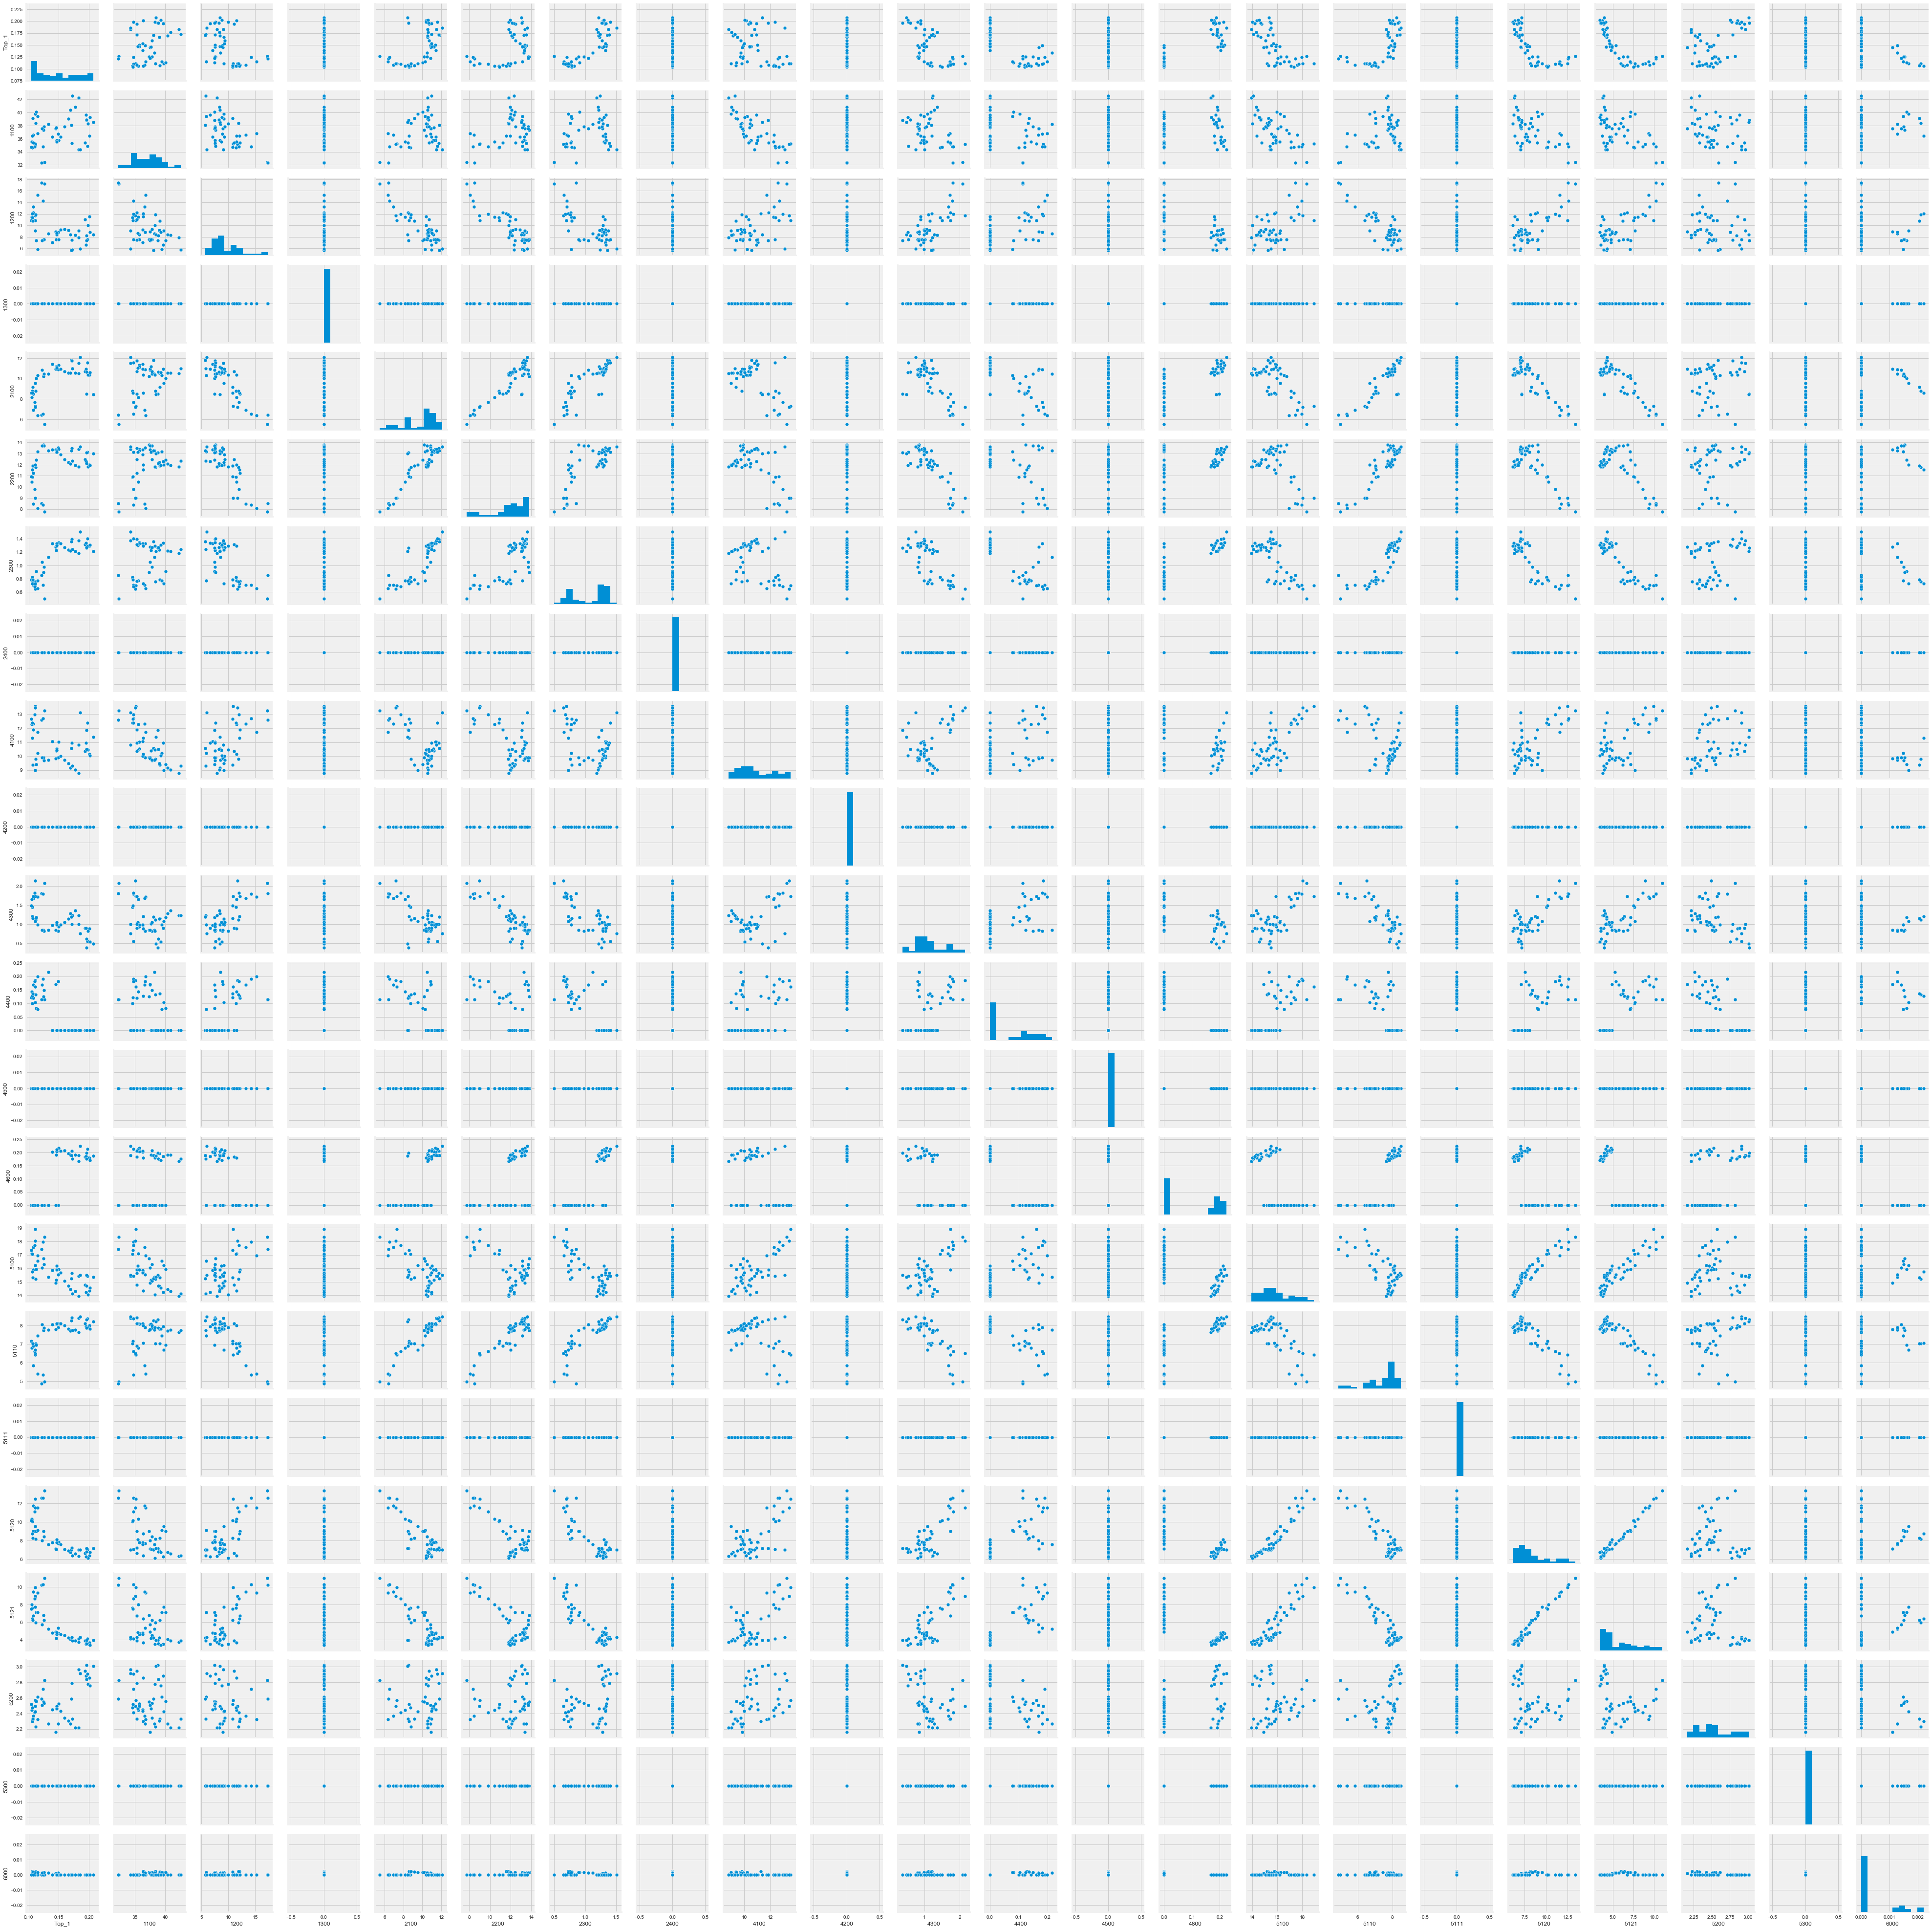

In [53]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(usa_df[cols2].dropna())

### Analyze GDP to Top 1

In [61]:
data_df.head(2)

,Country,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,1100,1200,1300,...,4600,5100,5110,5111,5120,5121,5200,5300,6000,GDP_growth
0,Australia,1965,0.0634,20.62,NaN,NaN,NaN,34.414809,16.281847,0.0,...,0.0,30.015924,7.364650,0.0,22.651274,15.545382,4.697452,0.0,0.0,5.983450
1,Australia,1966,0.0616,19.84,NaN,NaN,NaN,35.646688,14.974949,0.0,...,0.0,29.708666,7.069957,0.0,22.638708,15.661533,4.768974,0.0,0.0,2.382491


In [98]:
lr_df = data_df[data_df.GDP_growth < 20]
lr_df = lr_df[['Top_1', 'GDP_growth']]
lr_df.dropna(inplace=True)

In [102]:
lr_df.shape

(631, 2)

In [106]:
lr_df.Top_1.describe()

count    631.000000
mean       0.088695
std        0.030908
min        0.040700
25%        0.065400
50%        0.085500
75%        0.104336
max        0.207790
Name: Top_1, dtype: float64

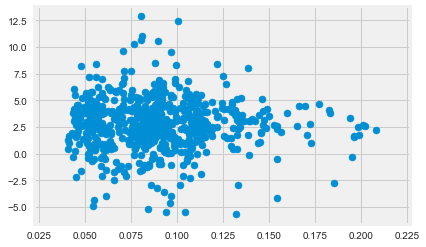

In [109]:
plt.scatter(lr_df.Top_1, lr_df.GDP_growth)

In [64]:
data_df[data_df.GDP_growth > 20]

,Country,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,1100,1200,1300,...,4600,5100,5110,5111,5120,5121,5200,5300,6000,GDP_growth
304,Ireland,2015,0.115,23.122,8.302016,10.997023,48.0,31.634434,11.343474,0.007338,...,0.0,29.429504,19.731946,19.731946,9.697558,9.041153,3.192784,0.0,0.019381,25.557269


In [110]:
X = np.array(lr_df.Top_1)
X

array([0.0634    , 0.0616    , 0.0625    , 0.0605    , 0.0592    ,
       0.0558    , 0.0559    , 0.0574    , 0.0541    , 0.0498    ,
       0.049     , 0.0476    , 0.0471    , 0.0466    , 0.0462    ,
       0.0458    , 0.0442    , 0.0449    , 0.045     , 0.0455    ,
       0.0482    , 0.052     , 0.0604    , 0.0705    , 0.0591    ,
       0.057     , 0.0586    , 0.0599    , 0.0623    , 0.0647    ,
       0.0642    , 0.0646    , 0.0689    , 0.0705    , 0.0789    ,
       0.0821    , 0.0757    , 0.0793    , 0.0812    , 0.0842    ,
       0.0872    , 0.0951    , 0.0911    , 0.0808    , 0.0837    ,
       0.0855    , 0.0822    , 0.0852    , 0.0904    , 0.0898    ,
       0.091     , 0.09201   , 0.08908   , 0.08997   , 0.09035   ,
       0.09008   , 0.08969   , 0.08866   , 0.08916   , 0.08982   ,
       0.08967   , 0.08911   , 0.08288   , 0.08011   , 0.08101   ,
       0.08457   , 0.08884   , 0.08546   , 0.08892   , 0.08762   ,
       0.08727   , 0.0888    , 0.09153   , 0.0988    , 0.10741

In [123]:
X, y = np.array(lr_df.Top_1).reshape(-1, 1), np.array(lr_df.GDP_growth).reshape(-1, 1)

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
lm.coef_

array([[-2.83510751]])

In [119]:
X_lr = np.linspace(0.025, 0.225)

array([0.025     , 0.02908163, 0.03316327, 0.0372449 , 0.04132653,
       0.04540816, 0.0494898 , 0.05357143, 0.05765306, 0.06173469,
       0.06581633, 0.06989796, 0.07397959, 0.07806122, 0.08214286,
       0.08622449, 0.09030612, 0.09438776, 0.09846939, 0.10255102,
       0.10663265, 0.11071429, 0.11479592, 0.11887755, 0.12295918,
       0.12704082, 0.13112245, 0.13520408, 0.13928571, 0.14336735,
       0.14744898, 0.15153061, 0.15561224, 0.15969388, 0.16377551,
       0.16785714, 0.17193878, 0.17602041, 0.18010204, 0.18418367,
       0.18826531, 0.19234694, 0.19642857, 0.2005102 , 0.20459184,
       0.20867347, 0.2127551 , 0.21683673, 0.22091837, 0.225     ])

In [126]:
y_lr = X_lr*lm.coef_ + lm.intercept_
y_lr = y_lr[0]

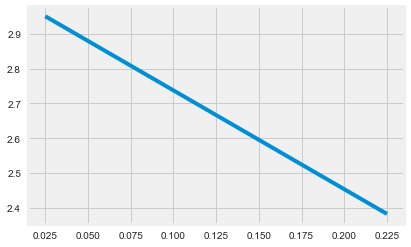

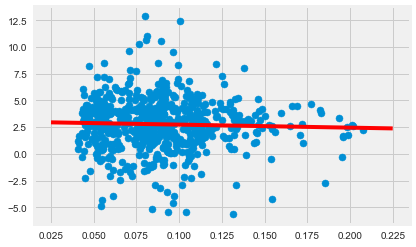

In [129]:
plt.plot(X_lr, y_lr, c='r')
plt.scatter(lr_df.Top_1, lr_df.GDP_growth)
plt.show()

In [132]:
len(data_df.Country.unique())

15